# User's Guide, Chapter 4: Lists, Streams (I) and Output

In the last two chapters, I introduced the concept of
:class:`~music21.note.Note` objects which are made up of
:class:`~music21.pitch.Pitch` and :class:`~music21.duration.Duration`
objects, and we even displayed a Note on a staff and played it
via MIDI.  But unless you're challenging Cage and Webern for the
status of least musical material, you will probably want to
analyze, manipulate, or create more than one Note.

Python has ways of working with multiple objects and `music21`
extends those ways to be more musical.  Let's look at how
Python does it first and then see how `music21` extends these
ways.  (If you've been programming for a bit, or especially
if you have Python experience, skip to the section on
Streams below after creating the objects `note1`, `note2` and
`note3` described below).

Say you have two notes, a C and an F# in the middle of the treble staff. 
(If the concept of working with a tritone bothers you, go ahead and make
the second note a G; we won't mind; we'll just call you Pope
Gregory from now on).  Lets create those notes:

## Working with multiple objects via Lists

In [1]:
from music21 import *
note1 = note.Note("C4")
note2 = note.Note("F#4")

Let's make the first note a half note by modifying its duration (by default
all `Note` objects are quarter notes):

In [2]:
note1.duration.type = 'half'
note1.duration.quarterLength

2.0

In [3]:
note2.duration.quarterLength

1.0

To print the `step` (that is, the name without any octave or accidental
information) of each of these notes, you could do something like this:

In [4]:
print(note1.step)

C


In [5]:
print(note2.step)

F


But suppose you had thirty notes?  Then it'd be a pain to type "`print(noteX.step)`"
thirty times.  Fortunately, there's a solution: we can put each of the 
note objects into a `List` which is a built in Python object that stores multiple
other objects (like Notes or Chords, or even things like numbers).  To create
a list in Python, put square brackets (`[]`) around the things that you want
to put in the list, separated by commas.  Let's create a list called `noteList`
that contains note1 and note2:

In [6]:
noteList = [note1, note2]

We can check that `noteList` contains our Notes by printing it:

In [7]:
print(noteList)

[<music21.note.Note C>, <music21.note.Note F#>]


The list is represented by the square brackets around the end with the comma in between them, just like how they were created originally.  The act of creation is mirrored in the representation.  That's nice.  Medieval philosophers would approve.

Now we can write a two-line program that will print the step of each note in noteList. Most modern languages have a way of doing some action for each member ("element") in a list (also called an "array" or sometimes "row").  In Python this is the "for" command. When you type these lines, make sure to type the spaces at the start of the second line.  (When you're done typing `print(thisNote.step)`, you'll probably have to hit enter twice to see the results.)

In [8]:
for thisNote in noteList:
    print(thisNote.step)

C
F


What's happening here? What ``for thisNote in noteList:`` says is that Python should
take each note in noteList in order and temporarily call that note "`thisNote`" (you
could have it called anything you want; `myNote`, `n`, `currentNote` are all good
names, but `note` is not because `note` is the name of a module).  Then the ":" at
the end of the line indicates that everything that happens for a bit will apply
to every `Note` in noteList one at a time.  How does Python know when "a bit" is
over?  Simple: every line that is a part of the loop needs to be indented by putting
in some spaces. (I usually use four spaces or hit tab.  Some people use two spaces. Just be consistent.)

Loops don't save much time here, but imagine if noteList had dozens or hundreds
of Notes in it?  Then the ability to do something to each object becomes more and
more important.

Let's add another note to noteList.  First let's create another note, a low B-flat:

In [9]:
note3 = note.Note("B-2")

Then we'll append that note to the end of noteList:

In [10]:
noteList.append(note3)

Lists can be manipulated or changed.  They are called "mutable" objects (we'll learn about immutable objects later). Streams, as we will see, can be manipulated the same way through `.append()`.

We can see that the length of noteList is now 3 using the `len()` function:

In [11]:
len(noteList)

3

And if we write our looping function again, we will get a third note:

In [12]:
for thisNote in noteList:
    print(thisNote.step)

C
F
B


We can find out what the first note of noteList is by writing:

In [13]:
noteList[0]

<music21.note.Note C>

Notice that in a list, the first element is `[0]`, not `[1]`.  There are all 
sorts of historical reasons why computers start counting lists with zero
rather than one--some good, some obsolete--but we need to live with this
if we're going to get any work done. Think of it like how floors are numbered
in European buildings compared to American buildings.  If we go forward one note, 
to the second note, we write:

In [14]:
noteList[1]

<music21.note.Note F#>

We can also ask `noteList` where is `note2` within it, using the `index()` method:

In [15]:
noteList.index(note2)

1

If we want to get the last element of a list, we can write:

In [16]:
noteList[-1]

<music21.note.Note B->

Which is how basements are numbered in Europe as well.  This is the same
element as `noteList[2]` (our third Note), as we can have Python prove:`

In [17]:
noteList[-1] is noteList[2]

True

Lists will become important tools in your programming, but they don't know
anything about music.  To get some intelligence into our music we'll need to
know about a `music21` object similar to lists, called a :class:`~music21.stream.Stream`.

## Introduction to Streams

The :class:`~music21.stream.Stream` object and its subclasses (Score, 
Part, Measure) are the fundamental containers for music21 objects such
as :class:`~music21.note.Note`, :class:`~music21.chord.Chord`, 
:class:`~music21.clef.Clef`, :class:`~music21.meter.TimeSignature` objects. 

A container is like a Python list (or an array in some languages).  

Objects stored in a Stream are generally spaced in time; each stored object has 
an offset usually representing how many quarter notes it lies from the beginning 
of the Stream.  For instance in a 4/4 measure of two half notes, the first note
will be at offset 0.0, and the second at offset 2.0. 

Streams, further, can store other Streams, permitting a wide variety of nested, 
ordered, and timed structures.  These stored streams also have offsets.  So if
we put two 4/4 Measure objects (subclasses of Stream) into a Part (also a 
type of Stream), then the first measure will be at offset 0.0 and the second
measure will be at offset 4.0.  

Commonly used subclasses of Streams include the :class:`~music21.stream.Score`, 
:class:`~music21.stream.Part`, and :class:`~music21.stream.Measure`. It is 
important to grasp that any time we want to collect and contain a group of 
music21 objects, we put them into a Stream. Streams can also be used for 
less conventional organizational structures. We frequently will build and pass 
around short-lived, temporary Streams, since doing this opens up a wide variety 
of tools for extracting, processing, and manipulating objects on the Stream. 
For instance, if you are looking at only notes on beat 2 of any measure, you'll
probably want to put them into a Stream as well.

A critical feature of music21's design that distinguishes it from other 
music analysis frameworks is that one music21 object can be 
simultaneously stored (or, more accurately, referenced) in more than one Stream. 
For examples, we might have numerous :class:`~music21.stream.Measure` Streams 
contained in a :class:`~music21.stream.Part` Stream. If we extract a region of 
this Part (using the :meth:`~music21.stream.Stream.measures` method), we get a 
new Stream containing the specified Measures and the contained notes. We have 
not actually created new 
notes within these extracted measures; the output Stream simply has references 
to the 
same objects. Changes made to Notes in this output Stream will be simultaneously 
reflected in Notes in the source Part.   There is one limitation though:
the same object should not appear twice in one hierarchical structure of Streams.
For instance, you should not put a note object in both measure 3 and measure 5
of the same piece -- it can appear in measure 3 of one piece and measure 5 of
another piece. (For instance, if you wanted to track a particular note's context
in an original version of a score and an arrangement). Most users will never
need to worry about these details: just know that this feature lets music21
do some things that no other software package can do.

## Creating simple Streams

Objects stored in Streams are called elements and must be some type of Music21Object (don’t worry, almost everything in music21 is a Music21Object, such as Note, Chord, TimeSignature, etc.).

(If you want to put an object that's not a Music21Object in a Stream, 
put it in an :class:`~music21.base.ElementWrapper`.) 

Streams are similar to Python lists in that they hold individual elements
in order.  They're different in that they can only hold `music21` objects
such as Notes or :class:`~music21.clef.Clef` objects.  But they're a lot
smarter and more powerful.

To create a Stream you'll need to type `stream.Stream()` and assign it to
a variable using the equal sign.  Let's call our Stream `stream1`:

In [18]:
stream1 = stream.Stream()

Notice that just like how the (capital) `Note` object lives in a module
called (lowercase) `note`, the (capital) `Stream` object lives in a module
called (lowercase) `stream`.  Variable names, like `stream1` can be either
uppercase or lowercase, but I tend to use lowercase variable names (or camelCase
like we did with `noteList`).  
The most common use of Streams is as places to store Notes. So let's do just that: we can add the three `Note` objects we created above by using the `append` method of `Stream`:

In [19]:
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

Of course, this would be a pain to type for hundreds of `Notes`, so we could also use the Stream method :meth:`~music21.stream.Stream.repeatAppend` to add a number of independent, unique copies of the same Note. This creates independent copies (using Python's `copy.deepcopy` function) of the supplied object, not references.

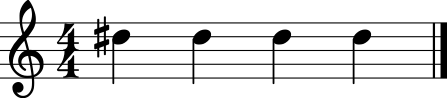

In [20]:
stream2 = stream.Stream()
n3 = note.Note('D#5') # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
stream2.show()

But let's worry about that later. Going back to our first stream, we can see that it has three notes using the same `len()` function that we used before:

In [21]:
len(stream1)

3

Alternatively, we can use the :meth:`~music21.base.Music21Object.show` method 
called as `show('text')` to see what is in the Stream and what its offset 
is (here 0.0, since we put it at the end of an empty stream).

In [22]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


If you’ve setup your environment properly, then calling show with the `musicxml` argument should open up Finale Reader, or Sibelius, or MuseScore or some music notation software and display the notes below.

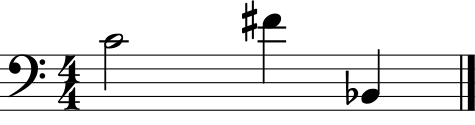

In [23]:
stream1.show()

## Accessing Streams

We can also dive deeper into streams. Let's get the `step` of each `Note` using the `for thisNote in ...:`
command. But now we'll use `stream1` instead of `noteList`:

In [24]:
for thisNote in stream1:
    print(thisNote.step)

C
F
B



And we can get the first and the last `Note` in a `Stream` by using the [X] form, just like other Python list-like objects:

In [25]:
stream1[0]

<music21.note.Note C>

In [26]:
stream1[-1].nameWithOctave

'B-2'

While full list-like functionality of the Stream isn't there, some additional methods familiar to users of Python lists are also available. The Stream :meth:`~music21.stream.Stream.index` method can be used to get the first-encountered index of a supplied object.

In [27]:
note3Index = stream1.index(note3)
note3Index

2

Given an index, an element from the Stream can be removed with the :meth:`~music21.stream.Stream.pop` method. 

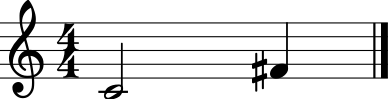

In [28]:
stream1.pop(note3Index)
stream1.show()

Since we removed `note3` from `stream1` with the the :meth:`~music21.stream.Stream.pop` method, let's add `note3` back into `stream1` so that we can continue with the examples below using `stream1` as we originally created it.

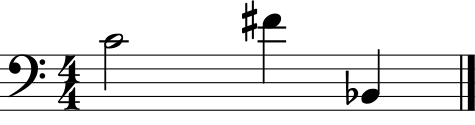

In [29]:
stream1.append(note3)
stream1.show()

### Separating out elements by class with `.getElementsByClass()`

We can also gather elements based on the class (object type) of the element, by offset range, or by specific identifiers attached to the element. Gathering elements from a Stream based on the class of the element provides a way to filter the Stream for desired types of objects. The :meth:`~music21.stream.Stream.getElementsByClass` method iterates over a Stream of elements that are instances or subclasses of the provided classes. The example below gathers all :class:`~music21.note.Note` objects and then all :class:`~music21.note.Rest` objects. The easiest way to do this is to use `for` loops with `.getElementsByClass()`:

In [30]:
for thisNote in stream1.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


If you want instead of passing the class `note.Note` you could instead pass the string `"Note"`.

In [31]:
for thisNote in stream1.getElementsByClass("Note"):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


It is also possible to pass in a list of classes or strings of class names to `.getElementsByClass()` which will return anything that matches any of the classes.  Notice the `[]` marks in the next call, indicating that we are creating a list to pass to `.getElementsByClass()`:

In [32]:
for thisNote in stream1.getElementsByClass(["Note", "Rest"]):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


Since there are no `note.Rest` objects, it's the same as above.  Oh well...

`music21` has a couple of shortcuts that are equivalent to `.getElementsByClass`. For instance `.notes` is equivalent to `.getElementsByClass(["Note", "Chord"])` (we'll get to chords soon):

In [33]:
for thisNote in stream1.notes:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


And `.notesAndRests` is equivalent to `.getElementsByClass(['Note', 'Chord', 'Rest'])`.

In [34]:
for thisNote in stream1.notesAndRests:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


Finally, there's something slightly different. `.pitches` begins with a call to `.notes`, but then returns a list  of all the pitches from every `Note` or `Chord` in the Stream:

In [35]:
listOut = stream1.pitches
listOut

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

The result of a `.getElementsByClass` are not technically streams, but you can still call `.show()` on it:

In [36]:
sOut = stream1.getElementsByClass(note.Note)
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


But if you want to be absolutely sure, put the expression `.stream()` after it:

In [37]:
sOut = stream1.getElementsByClass(note.Note).stream() # <-- different
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


### Separating out elements by offset with `.getElementsByOffset()`

The :meth:`~music21.stream.Stream.getElementsByOffset` method returns a Stream of all elements that fall either at a single offset or within a range of two offsets provided as an argument. In both cases a Stream is returned.

In [38]:
sOut = stream1.getElementsByOffset(3)
len(sOut)

1

In [39]:
sOut[0]

<music21.note.Note B->

Like with `.getElementsByClass()` if you want a `Stream` from `.getElementsByOffset()`, add `.stream()` to the end of it.

In [40]:
sOut = stream1.getElementsByOffset(2, 3).stream()
sOut.show('text')

{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


We will do more with `.getElementsByOffset()` later when we also talk about :meth:`~music21.stream.Stream.getElementAtOrBefore` and :meth:`~music21.stream.Stream.getElementAfterElement`

## More Stream Features

Okay, so far we've seen that `Streams` can do the same things as lists, but
can they do more?  Let's call the analyze method on stream to get the
ambitus (that is, the range from the lowest note to the highest note) of
the `Notes` in the `Stream`:

In [41]:
stream1.analyze('ambitus')

<music21.interval.Interval A12>

Let's take a second to check this.  Our lowest note is `note3` (B-flat in octave 2)
and our highest note is `note2` (F-sharp in octave 4).  From B-flat to the F-sharp
above it, is an augmented fifth.  An augmented fifth plus an octave is an augmented
twelfth.  So we're doing well so far.  (We'll get to other things we can analyze in
chapter 18 and we'll see what an :class:`~music21.interval.Interval` object can do
in chapter 15).

As we mentioned earlier, when placed in a Stream, Notes and other elements also have an offset (stored in .offset) that describes their position from the beginning of the stream. These offset values are also given in quarter-lengths (QLs).

Once a Note is in a Stream, we can ask for the `offset` of the `Notes` (or
anything else) in it.  The `offset` is the position of a Note relative to the start
of the `Stream` measured in quarter notes.  So note1's offset will be 0.0, 
since it's at the start of the Stream:

In [42]:
note1.offset

0.0

`note2`'s offset will be 2.0, since `note1` is a half note, worth two quarter notes:

In [43]:
note2.offset

2.0

And `note3`, which follows the quarter note `note2` will be at offset 3.0:

In [44]:
note3.offset

3.0

(If we made `note2` an eighth note, then `note3`'s offset would be the floating point
[decimal] value 2.5.  But we didn't.)  So now when we're looping we can see the offset of
each note.  Let's print the note's offset followed by its name by putting .offset and .name
in the same line, separated by a comma:

In [45]:
for thisNote in stream1:
    print(thisNote.offset, thisNote.name)

0.0 C
2.0 F#
3.0 B-


(**Digression**: It's probably not too early to learn that a safer form of `.offset` is `.getOffsetBySite(stream1)`:

In [46]:
note2.offset

2.0

In [47]:
note2.getOffsetBySite(stream1)

2.0

What's the difference?  Remember how I said that `.offset` refers to the number of quarter notes
that the `Note` is from the front of a `Stream`? Well, eventually you may put the same `Note` in
different places in multiple `Streams`, so the `.getOffsetBySite(X)` command is a safer way that
specifies exactly which Stream we are talking about.  End of digression...)

As a final note about offsets, the :attr:`~music21.stream.Stream.lowestOffset` property returns the minimum of all offsets for all elements on the Stream.

In [48]:
stream1.lowestOffset

0.0

So, what else can we do with Streams?  Like `Note` objects, we can `show()` them in a couple of different
ways.  Let's hear these three Notes as a MIDI file:

In [49]:
stream1.show('midi')

Or let's see them as a score:

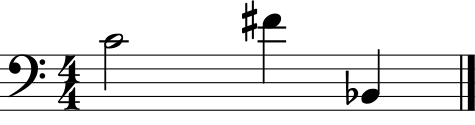

In [50]:
stream1.show()

You might ask why is the piece in common-time (4/4)? This is just the default for new pieces, which is in the 
`defaults` module:

In [51]:
defaults.meterNumerator

4

In [52]:
defaults.meterDenominator

'quarter'

(Some of these examples use a system that automatically tries to get an appropriate time signature and appropriate clef; in this case, `music21` figured out that that low B-flat would be easier to see in bass clef than treble.)

We'll learn how to switch the :class:`~music21.meter.TimeSignature` soon enough.

If you don't have MIDI or MusicXML configured yet (we'll get to it in a second) and you don't want to have 
other programs open up, you can show a `Stream` in text in your editor:

In [53]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


This display shows the `offset` for each element (that is, each object in the Stream) along with
what class it is, and a little bit more helpful information.  The information is the same as
what's called the ``__repr__`` (representation) of the object, which is what you get if you type
its variable name at the prompt:

In [54]:
note1

<music21.note.Note C>

By the way, Streams have a ``__repr__`` as well:

In [55]:
stream1

<music21.stream.Stream 0x1074dc4e0>

that number at the end is the hex form of the `.id` of the `Stream`, which is a way of identifying it.  Often
the `.id` of a Stream will be the name of the `Part` ("Violin II"), but if it's undefined
then a somewhat random number is used (actually the location of the Stream in your computer's
memory).  We can change the `.id` of a Stream:

In [56]:
stream1.id = 'some_notes'
stream1

<music21.stream.Stream some_notes>

We could have also changed the `.id` of any of our `Note` objects, but it doesn't show up in
the `Note`'s ``__repr__``:

In [57]:
note1.id = 'my_favorite_C'
note1

<music21.note.Note C>

Now, a `Stream` is a :class:`~music21.base.Music21Object` just like a `Note` is.  This is why
it has an `.id` attribute and, more importantly, why you can call `.show()` on it. 

What else makes a `Music21Object` what it is?
It has a `.duration` attribute which stores a `Duration` object:

In [58]:
stream1.duration

<music21.duration.Duration 4.0>

In [59]:
stream1.duration.type

'whole'

In [60]:
stream1.duration.quarterLength

4.0

(Notice that the `len()` of a `Stream`, which stands for "length", is not the same as the duration. 
the `len()` of a Stream is the number of objects stored in it, so `len(stream1)` is 3).

A related concept to the `.duration` of a Stream is its `.highestTime`, which is the time at which the latest element in the `Stream` ends.  Usually this is the last element of the stream's `.offset` plus its `.quarterLength`.

In [61]:
stream1.highestTime

4.0

## Streams within Streams

And, as a `Music21Object`, a `Stream` can be placed inside of another `Stream` object.  Let's create
a stream, called biggerStream (for reasons that will become obvious), that holds a `Note` D# at the
beginning

In [62]:
biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)

Now we use the `.append` functionality to put `stream1` at the end of `biggerStream`:

In [63]:
biggerStream.append(stream1)

Notice that when we call `.show('text')` on biggerStream, we see not only the presence of `note2`
and `stream1` but also all the contents of `stream1` as well:

In [64]:
biggerStream.show('text') 

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some_notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


Notice though that the offsets, the little numbers inside curly brackets, for the elements of
`stream1` ("some notes") relate only to their positions within `stream1`, not to their position
within `biggerStream`.  This is because each `Music21Object` knows its offset only in relation
to its containing `Stream`, not necessarily to the `Stream` containing *that* `Stream`.  

Also notice that `note1` knows that it is in `stream1` but doesn't know that it is somewhere inside
`biggerStream`:

In [65]:
note1 in stream1

True

In [66]:
note1 in biggerStream

False

All this might not seem like much of a big deal, until we tell you that in music21, `Scores` are
made up of `Streams` within `Streams` within `Streams`.  So if you have an orchestral score, it is
a `Stream`, and the viola part is a `Stream` in that `Stream`, and measure 5 of the viola part is a
`Stream` within that `Stream`, and, if there were a ''divisi'', then each ''diviso'' voice would be
a `Stream` within that `Stream`.  Each of these `Streams` has a special name and its own class 
(:class:`~music21.stream.Score`, :class:`~music21.stream.Part`, :class:`~music21.stream.Measure`,
and :class:`~music21.stream.Voice`), but they are all types of `Streams`.  

So how do we find `note1` inside `biggerStream`?  That's what the next two chapters are about.

:ref:`Chapter 5 covers Lists of Lists <usersGuide_05_listsOfLists>`.  Those with programming experience who have familiarity with
lists of lists and defining functions might want to skip to :ref:`Chapter 6 Streams of Streams <usersGuide_06_stream2>`.